In [1]:
%pip install prophet
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from prophet import Prophet
import warnings

warnings.simplefilter("ignore")

df = pd.read_csv('CL-DA-Карьерный_блок-Python-дз.csv', sep=';', encoding='latin-1')
df

,id,create_date,rent_price,deposit,floor,area_total,rooms,region,repair_type,agent_fee
0,1,2021-12-06 09:54:22.001 +0300,88400.0,NaN,2,63.2,2,1,NaN,NaN
1,2,2021-12-06 09:52:18.815 +0300,88100.0,NaN,6,53.6,2,1,NaN,NaN
2,3,2021-12-06 09:48:26.329 +0300,36000.0,NaN,9,39.0,1,1,NaN,NaN
3,4,2021-12-06 09:46:42.017 +0300,35000.0,NaN,5,40.0,1,1,NaN,NaN
4,5,2021-12-06 09:45:50.589 +0300,30000.0,NaN,8,28.0,0,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4995,4996,2021-12-01 21:06:05.572 +0300,33000.0,33000.0,5,37.0,1,1,cosmetic,60.0
4996,4997,2021-12-01 21:04:25.275 +0300,35000.0,35000.0,1,46.0,2,2,cosmetic,0.0
4997,4998,2021-12-01 21:04:11.731 +0300,40000.0,40000.0,2,54.3,2,2,unknown,0.0
4998,4999,2021-12-01 21:03:25.016 +0300,30000.0,30000.0,10,61.0,2,2,cosmetic,0.0


In [2]:
df.describe()

,id,rent_price,deposit,floor,rooms,region,agent_fee
count,5000.000000,5000.000000,4.912000e+03,5000.000000,5000.000000,5000.000000,4912.000000
mean,2500.500000,56969.306000,7.247456e+04,7.405400,1.615600,1.250200,42.043770
std,1443.520003,41921.368672,1.426763e+06,5.627769,0.885208,0.433171,32.951788
min,1.000000,6300.000000,0.000000e+00,1.000000,-1.000000,1.000000,0.000000
25%,1250.750000,35000.000000,3.000000e+04,3.000000,1.000000,1.000000,0.000000
50%,2500.500000,45000.000000,4.300000e+04,6.000000,2.000000,1.000000,50.000000
75%,3750.250000,60000.000000,6.000000e+04,10.000000,2.000000,2.000000,50.000000
max,5000.000000,300000.000000,1.000000e+08,55.000000,6.000000,2.000000,100.000000


In [3]:
df['create_date'] = df.apply(lambda row: pd.to_datetime(row['create_date'], format = '%Y-%m-%d %H:%M:%S'), axis=1)
#df['area_total'] = df['area_total'].astype(float)
df.drop_duplicates(inplace=True)
df['agent_fee'].fillna(value = 0, inplace=True)
df['repair_type'].fillna(value = 'unknown', inplace=True)
df['deposit'].fillna(df['deposit'].mean(), inplace=True)
df.drop(df[df.rooms == -1].index, inplace = True)
df.isnull().sum()

id             0
create_date    0
rent_price     0
deposit        0
floor          0
area_total     0
rooms          0
region         0
repair_type    0
agent_fee      0
dtype: int64

In [4]:
df.describe()

,id,rent_price,deposit,floor,rooms,region,agent_fee
count,4999.000000,4999.000000,4.999000e+03,4999.000000,4999.000000,4999.00000,4999.000000
mean,2500.914183,56960.698140,7.247906e+04,7.405681,1.616123,1.25025,41.312062
std,1443.367246,41921.142897,1.414291e+06,5.628297,0.884523,0.43320,33.123314
min,1.000000,6300.000000,0.000000e+00,1.000000,0.000000,1.00000,0.000000
25%,1251.500000,35000.000000,3.000000e+04,3.000000,1.000000,1.00000,0.000000
50%,2501.000000,45000.000000,4.400000e+04,6.000000,2.000000,1.00000,50.000000
75%,3750.500000,60000.000000,6.000000e+04,10.000000,2.000000,2.00000,50.000000
max,5000.000000,300000.000000,1.000000e+08,55.000000,6.000000,2.00000,100.000000


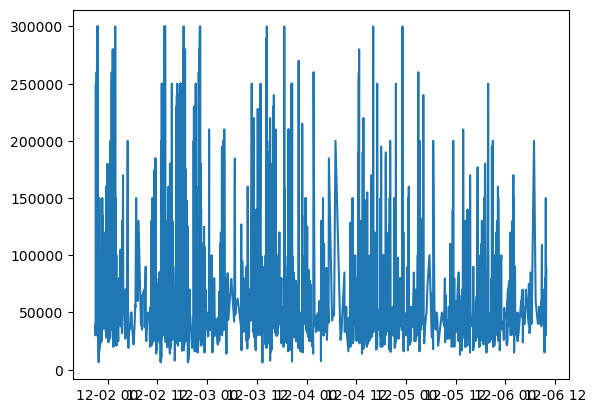

In [5]:
plt.plot(df['create_date'], df['rent_price'])

<AxesSubplot:xlabel='rent_price', ylabel='Count'>

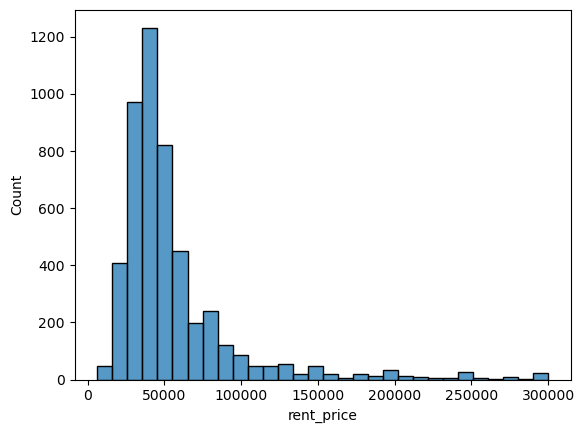

In [6]:
sns.histplot(df['rent_price'], bins = 30)

<AxesSubplot:xlabel='rent_price'>

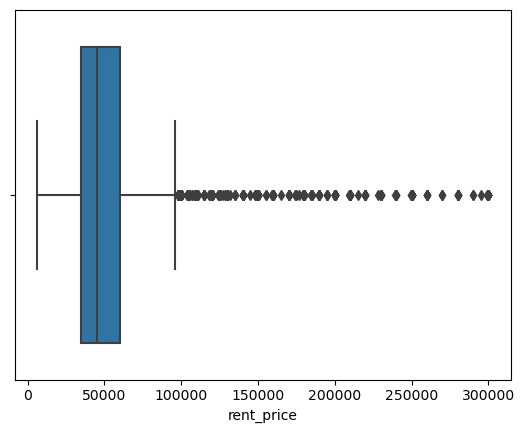

In [7]:
sns.boxplot(x=df['rent_price'])

<AxesSubplot:>

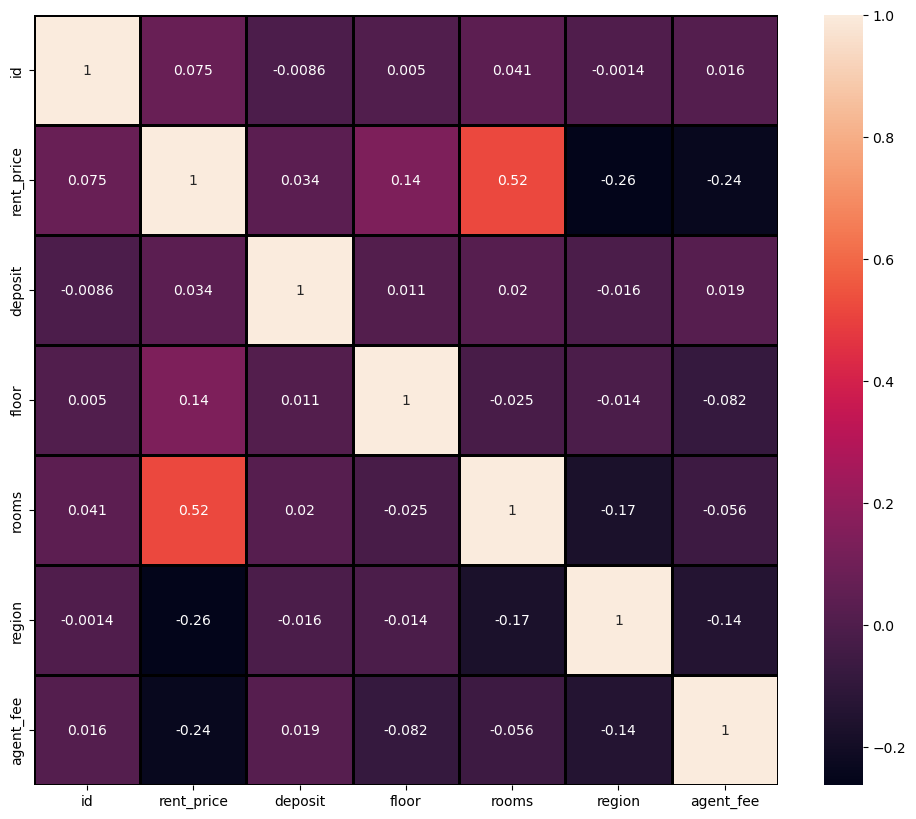

In [8]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), linecolor = 'black', linewidths=1, annot = True)

In [9]:
#model = LogisticRegression()
model = RandomForestClassifier()
X = df[['floor', 'rooms', 'deposit', 'region']]
Y = df['rent_price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.42)
model.fit(X_train, Y_train)
Y_predicted = model.predict(X_test)
predicted_table = pd.DataFrame(Y_predicted)
print('Accuracy: %.2f' % accuracy_score(Y_test, Y_predicted))

Accuracy: 0.67


18:17:17 - cmdstanpy - INFO - Chain [1] start processing
18:17:17 - cmdstanpy - INFO - Chain [1] done processing


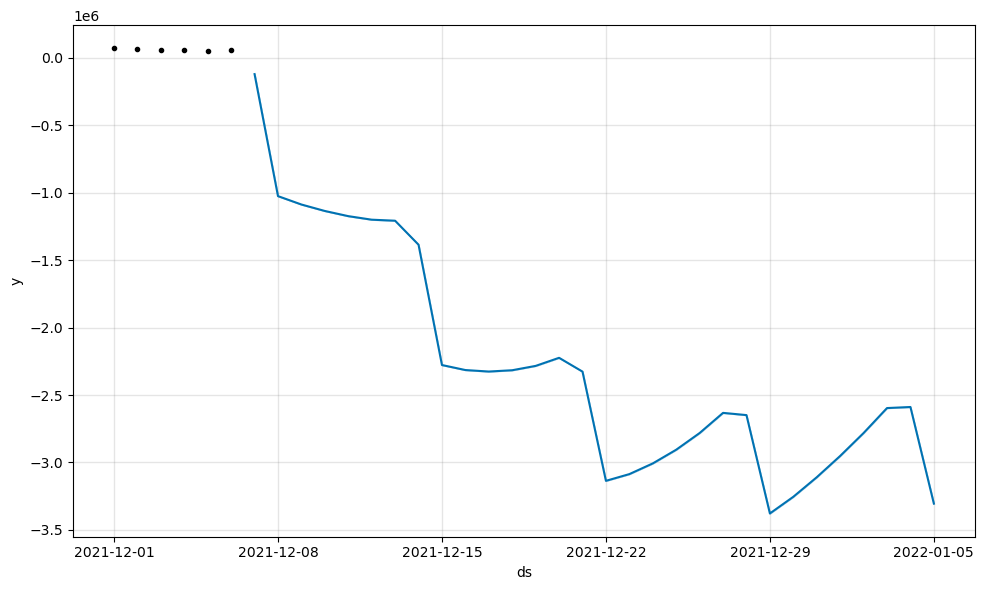

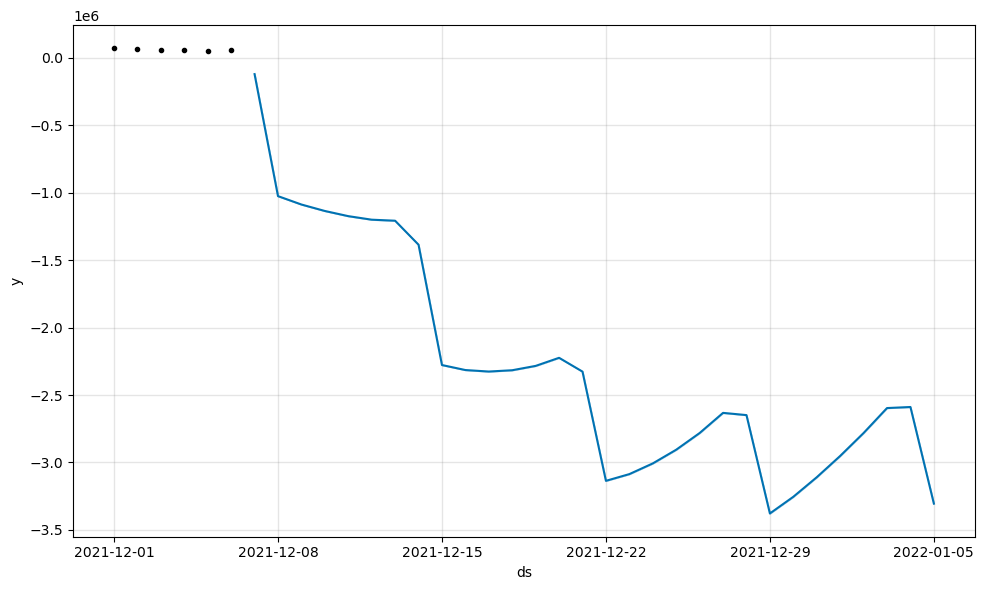

In [10]:
df_for_modelling = df[['create_date', 'rent_price']].groupby([df['create_date'].dt.date]).mean()
df_for_modelling = df_for_modelling.reset_index()
df_for_modelling = df_for_modelling.rename(columns={'create_date':'ds', 'rent_price':'y'})
model = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model.fit(df_for_modelling)
predictions_period = model.make_future_dataframe(periods=30)
predictions_period = predictions_period[-30:]
forecast = model.predict(predictions_period)
model.plot(forecast)